In [131]:
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import lightgbm
import sklearn

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import r2_score,  mean_absolute_percentage_error

In [2]:
df_2010 = pd.read_csv('data/2010.csv')

In [3]:
df_2010.set_index('time', inplace=True)
df_2010.head()

,ca,unit,scp,station,linename,division,desc,entries,exits
time,,,,,,,,,
2010-04-17 04:00:00,A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,REGULAR,2704717.0,928793.0
2010-04-17 04:00:00,A002,R051,02-00-01,LEXINGTON AVE,456NQR,BMT,REGULAR,2697632.0,566683.0
2010-04-17 04:00:00,A002,R051,02-03-00,LEXINGTON AVE,456NQR,BMT,REGULAR,1127722.0,3943492.0
2010-04-17 04:00:00,A002,R051,02-03-01,LEXINGTON AVE,456NQR,BMT,REGULAR,2425570.0,3733289.0
2010-04-17 04:00:00,A002,R051,02-03-02,LEXINGTON AVE,456NQR,BMT,REGULAR,2214633.0,3021589.0


In [4]:
df_2010.station.unique()

array(['LEXINGTON AVE', '57 ST-7 AVE', '49 ST-7 AVE', '42 ST-TIMES SQ',
       '34 ST-HERALD SQ', '28 ST-BROADWAY', '23 ST-5 AVE',
       "8 ST-B'WAY NYU", "PRINCE ST-B'WAY", "MURRAY ST-B'WAY",
       'RECTOR ST', 'BOWERY', 'CHAMBERS ST', 'PROSPECT PARK',
       'CHURCH AVE', 'BEVERLEY ROAD', 'CORTELYOU ROAD', 'AVE H', 'AVE J',
       'AVE M', 'KINGS HIGHWAY', 'NECK ROAD', 'BRIGHTON BEACH',
       'OCEAN PARKWAY', 'BOROUGH HALL/CT', 'JAY ST-METROTEC',
       'DEKALB AVE', 'PACIFIC ST', 'UNION ST', '9 ST', 'PROSPECT AVE',
       '25 ST', '45 ST', '53 ST', '59 ST', 'BAY RIDGE AVE', '77 ST',
       '86 ST', 'BAY RIDGE-95 ST', '50 ST', '55 ST', '71 ST', '79 ST',
       '18 AVE', '20 AVE', 'W 8 ST-AQUARIUM', '6 AVE', '3 AVE', '1 AVE',
       'BEDFORD AVE', 'GRAHAM AVE', 'GRAND ST', 'MONTROSE AVE',
       'MORGAN AVE', 'JEFFERSON ST', 'MYRTLE AVE', 'HALSEY ST',
       'WILSON AVE', 'BUSHWICK AVE', 'ATLANTIC AVE', 'CYPRESS HILLS',
       'ELDERTS LANE', 'FOREST PARKWAY', 'WOODHAVEN BLVD', '10

In [5]:
df_2010.division.unique()

array(['BMT', 'IND', 'IRT', nan, 'SRT', 'PTH', 'RIT'], dtype=object)

In [6]:
df_2010.query('station == "42 ST-TIMES SQ" and scp == "01-00-00" and division == "BMT"', inplace=True)
df_2010 = df_2010[~df_2010.index.duplicated(keep='first')]
df_2010.head()

,ca,unit,scp,station,linename,division,desc,entries,exits
time,,,,,,,,,
2010-04-17 04:00:00,A021,R032,01-00-00,42 ST-TIMES SQ,1237ACENQRS,BMT,REGULAR,19250.0,18644.0
2010-04-17 08:00:00,A021,R032,01-00-00,42 ST-TIMES SQ,1237ACENQRS,BMT,REGULAR,19267.0,18668.0
2010-04-17 12:00:00,A021,R032,01-00-00,42 ST-TIMES SQ,1237ACENQRS,BMT,REGULAR,19287.0,18726.0
2010-04-17 16:00:00,A021,R032,01-00-00,42 ST-TIMES SQ,1237ACENQRS,BMT,REGULAR,19424.0,19129.0
2010-04-17 20:00:00,A021,R032,01-00-00,42 ST-TIMES SQ,1237ACENQRS,BMT,REGULAR,19674.0,19546.0


In [7]:
df_2010.ca.unique(), df_2010.unit.unique(), df_2010.scp.unique(), df_2010.linename.unique(), df_2010.division.unique(), df_2010.desc.unique()

(array(['A021'], dtype=object),
 array(['R032'], dtype=object),
 array(['01-00-00'], dtype=object),
 array(['1237ACENQRS'], dtype=object),
 array(['BMT'], dtype=object),
 array(['REGULAR', 'AUD', 'DOOR', 'OPEN', 'RECOVR'], dtype=object))

In [8]:
years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017']

for year in years:
    df = pd.read_csv('data/'+year+'.csv')
    df.query('station == "42 ST-TIMES SQ" and scp == "01-00-00" and division == "BMT"', inplace=True)
    df = df.loc[~df.index.duplicated(keep='first')]
    df = df.set_index('time')
    df_2010 = pd.concat([df_2010, df])
df = df_2010
df

,ca,unit,scp,station,linename,division,desc,entries,exits
time,,,,,,,,,
2010-04-17 04:00:00,A021,R032,01-00-00,42 ST-TIMES SQ,1237ACENQRS,BMT,REGULAR,19250.0,18644.0
2010-04-17 08:00:00,A021,R032,01-00-00,42 ST-TIMES SQ,1237ACENQRS,BMT,REGULAR,19267.0,18668.0
2010-04-17 12:00:00,A021,R032,01-00-00,42 ST-TIMES SQ,1237ACENQRS,BMT,REGULAR,19287.0,18726.0
2010-04-17 16:00:00,A021,R032,01-00-00,42 ST-TIMES SQ,1237ACENQRS,BMT,REGULAR,19424.0,19129.0
2010-04-17 20:00:00,A021,R032,01-00-00,42 ST-TIMES SQ,1237ACENQRS,BMT,REGULAR,19674.0,19546.0
...,...,...,...,...,...,...,...,...,...
2015-12-25 12:00:00,A021,R032,01-00-00,42 ST-TIMES SQ,ACENQRS1237,BMT,REGULAR,5341668.0,6263145.0
2015-12-25 16:00:00,A021,R032,01-00-00,42 ST-TIMES SQ,ACENQRS1237,BMT,REGULAR,5341719.0,6263313.0
2015-12-25 20:00:00,A021,R032,01-00-00,42 ST-TIMES SQ,ACENQRS1237,BMT,REGULAR,5341865.0,6263713.0


In [321]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df.index = pd.to_datetime(df.index)
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['month'] = df['date'].dt.month
    df['dayofmonth'] = df['date'].dt.day
    df['desc_code'] = pd.Categorical(df.desc)
    df['desc_code'] =  df['desc_code'].cat.codes
    df['prev_entries'] = df['entries'].shift(1)
    df['prev_exits'] = df['exits'].shift(1)
    X = df[['prev_entries', 'prev_exits','desc_code', 
            'hour','dayofweek','month',
            'dayofmonth']]
    return X

In [325]:
X = create_features(df_2010)[1:]
y = df_2010[['entries']][1:]
X,y

(                     prev_entries  prev_exits  desc_code  hour  dayofweek  \
 time                                                                        
 2010-04-17 08:00:00       19250.0     18644.0          9     8          5   
 2010-04-17 12:00:00       19267.0     18668.0          9    12          5   
 2010-04-17 16:00:00       19287.0     18726.0          9    16          5   
 2010-04-17 20:00:00       19424.0     19129.0          9    20          5   
 2010-04-18 00:00:00       19674.0     19546.0          9     0          6   
 ...                           ...         ...        ...   ...        ...   
 2015-12-25 12:00:00     5341644.0   6263114.0          9    12          4   
 2015-12-25 16:00:00     5341668.0   6263145.0          9    16          4   
 2015-12-25 20:00:00     5341719.0   6263313.0          9    20          4   
 2015-12-26 00:00:00     5341865.0   6263713.0          9     0          5   
 2015-12-26 04:00:00     5342048.0   6264318.0          9     4 

In [326]:
estimator = lightgbm.LGBMRegressor()

In [327]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [328]:
split_fraction = 0.80
train_split = int(split_fraction * int(X.shape[0]))

In [329]:
x_train = X[:train_split]
y_train = y[:train_split]

x_val = X[train_split:]
y_val = y[train_split:]

In [330]:
result = cross_validate(
    estimator,
    x_train, y_train,
    cv=TimeSeriesSplit(),
    return_estimator=True,
    verbose=2,
    n_jobs=-1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished


In [331]:
y_pred = cross_val_predict(estimator, x_val, y_val, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished


0.8634935736573446
0.02205782338770904


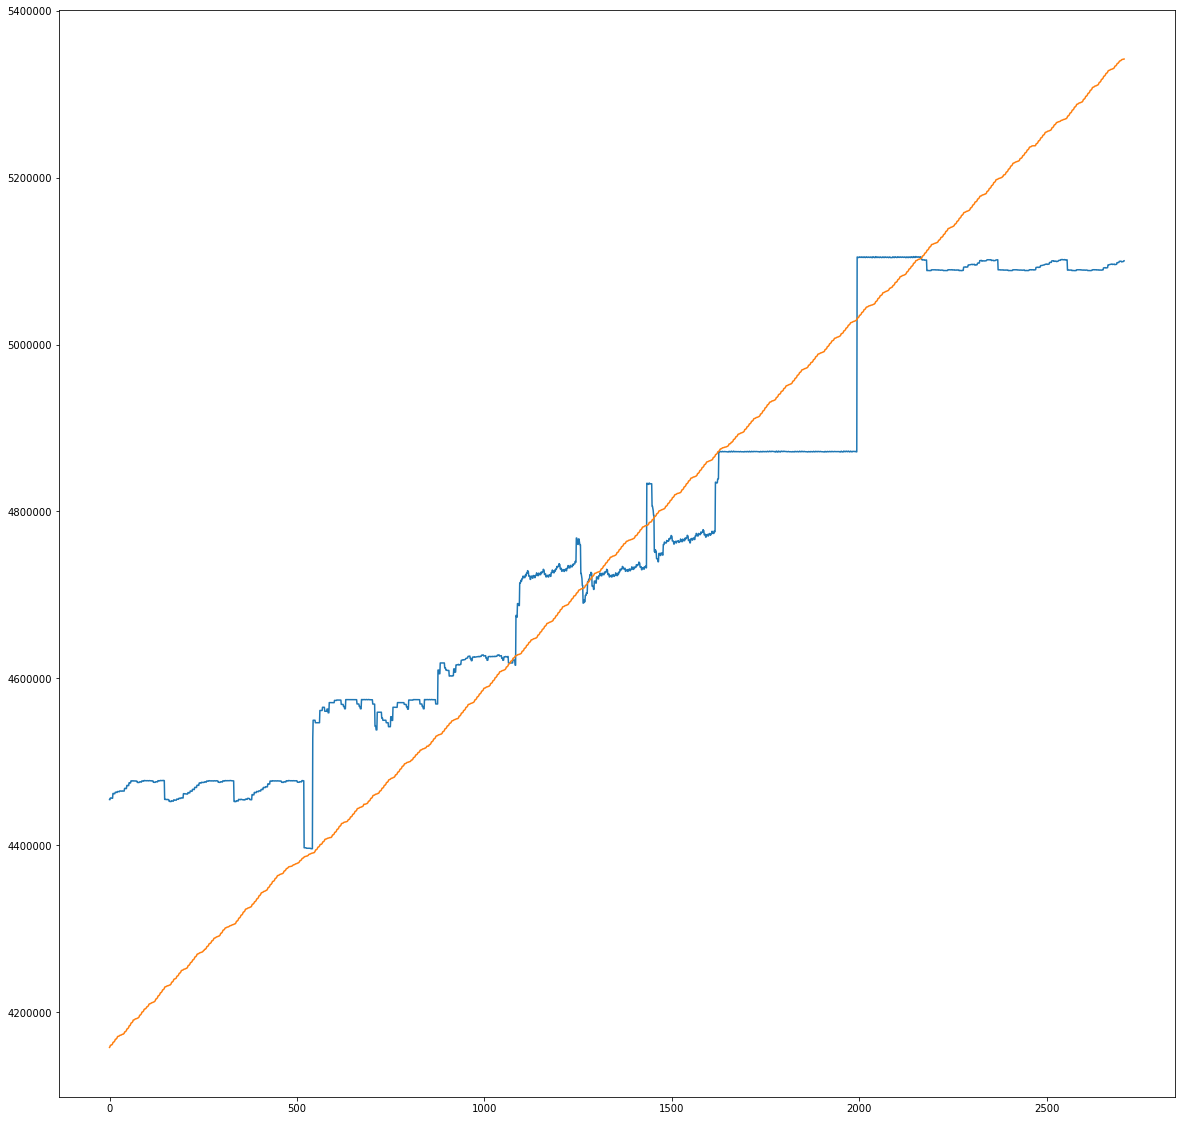

In [332]:
def plot_results(y_val, y_pred):
    plt.figure(figsize=(20,20))
    ax1 = plt.plot(y_pred)
    ax2 = plt.plot(y_val)
    print(r2_score(y_val, y_pred))
    print(mean_absolute_percentage_error(y_val, y_pred))
    plt.show()

plot_results(y_val.values, y_pred)

In [477]:
past = 12
future = 1
learning_rate = 0.001
batch_size = 64
epochs = 5

In [478]:
features =  X.values

In [479]:
x_train = features[:train_split]
x_val = features[train_split:]

y_train = y.values[:train_split]
y_val = y.values[train_split:]

In [480]:
start = past + future
end = start + train_split

sequence_length = past

In [481]:
dataset_train = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [482]:
x_end = len(y_val) - past - future

label_start = train_split + past + future

dataset_val = tf.keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)


Input shape: (64, 12, 7)
Target shape: (64, 1)


In [483]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(128,  activation='relu')(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss=tf.keras.losses.MeanSquaredLogarithmicError())
model.summary()


Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 12, 7)]           0         
_________________________________________________________________
lstm_39 (LSTM)               (None, 128)               69632     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 129       
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [484]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/5
169/169 [==============================] - 9s 44ms/step - loss: 28.8653 - val_loss: 3.8976e-05

Epoch 00001: val_loss improved from inf to 0.00004, saving model to model_checkpoint.h5
Epoch 2/5
169/169 [==============================] - 7s 43ms/step - loss: 0.0552 - val_loss: 5.0644e-06

Epoch 00002: val_loss improved from 0.00004 to 0.00001, saving model to model_checkpoint.h5
Epoch 3/5
169/169 [==============================] - 7s 42ms/step - loss: 0.0376 - val_loss: 6.7950e-05

Epoch 00003: val_loss did not improve from 0.00001
Epoch 4/5
169/169 [==============================] - 7s 42ms/step - loss: 0.0596 - val_loss: 5.8575e-06

Epoch 00004: val_loss did not improve from 0.00001
Epoch 5/5
169/169 [==============================] - 7s 42ms/step - loss: 0.0059 - val_loss: 2.9687e-06

Epoch 00005: val_loss improved from 0.00001 to 0.00000, saving model to model_checkpoint.h5


loss=tf.keras.losses.MeanAbsolutePercentageError()
loss(y.values, np.array(model.predict(X))).numpy()

0.9994024065708085
0.0016128465891477354


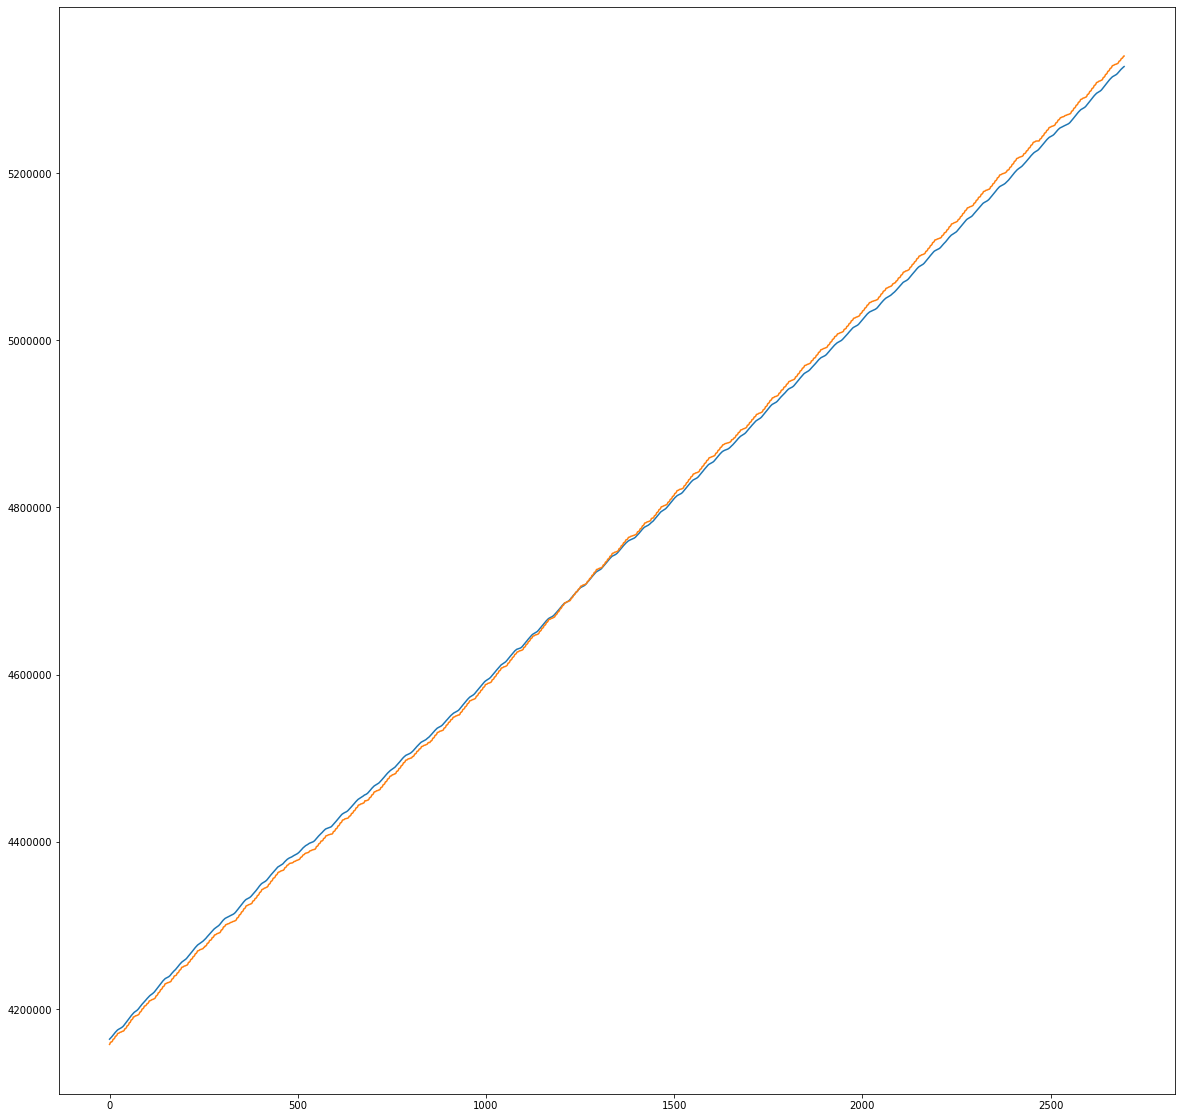

In [485]:
y_pred = model.predict(dataset_val)
plot_results(y_val[:len(y_pred)], y_pred)